In [2]:
import pandas as pd
df = pd.read_csv('tested.csv')
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [3]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [10]:
print("Count of null values before filling:")
print(df.isnull().sum())

df['Age'].fillna(df['Age'].mean(), inplace=True)

print("\nCount of null values after filling:")
print(df.isnull().sum())


Count of null values before filling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Count of null values after filling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[features]
y = df['Survived']

numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
numeric_transformer = StandardScaler()

categorical_features = ['Pclass', 'Sex']
categorical_transformer = OneHotEncoder(drop='first', sparse=False)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

preprocessor = ColumnTransformer( transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(random_state=42))])
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



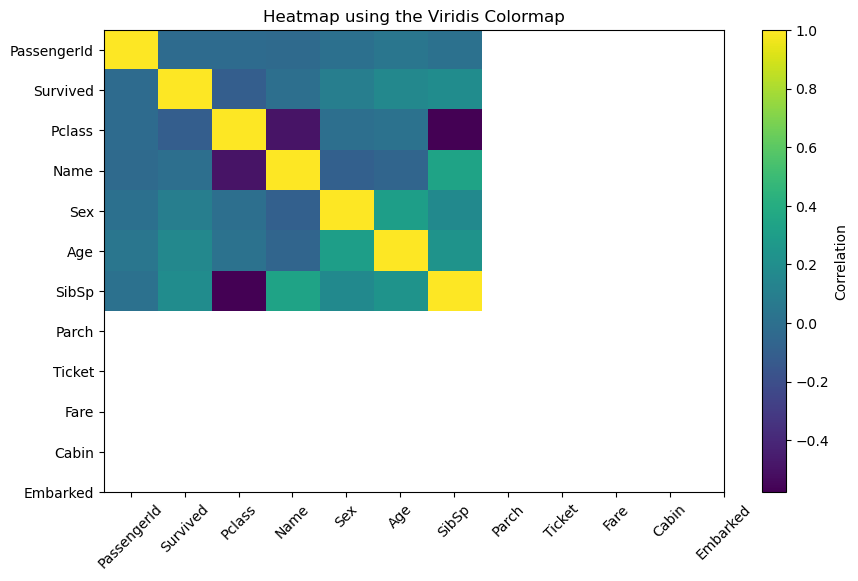

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
heatmap = plt.imshow(df.corr(numeric_only=True), cmap='viridis', aspect='auto')

plt.colorbar(heatmap, label='Correlation')

plt.xticks(np.arange(len(df.columns)), df.columns, rotation=45)
plt.yticks(np.arange(len(df.columns)), df.columns)

plt.title('Heatmap using the Viridis Colormap')
plt.show()

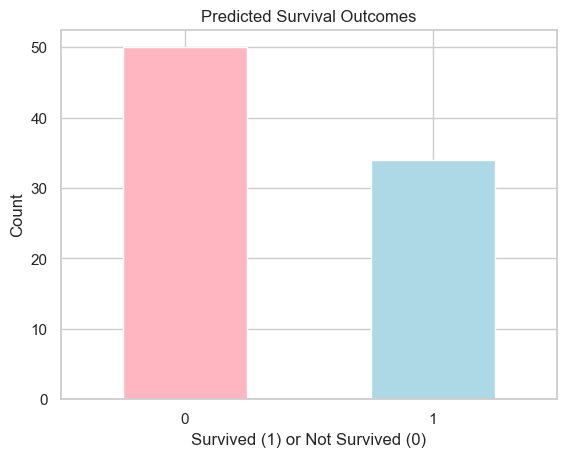

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
survival_counts = pd.Series(y_pred).value_counts()
survival_counts.plot(kind='bar', color=['lightpink', 'lightblue'])
plt.title('Predicted Survival Outcomes')
plt.xlabel('Survived (1) or Not Survived (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


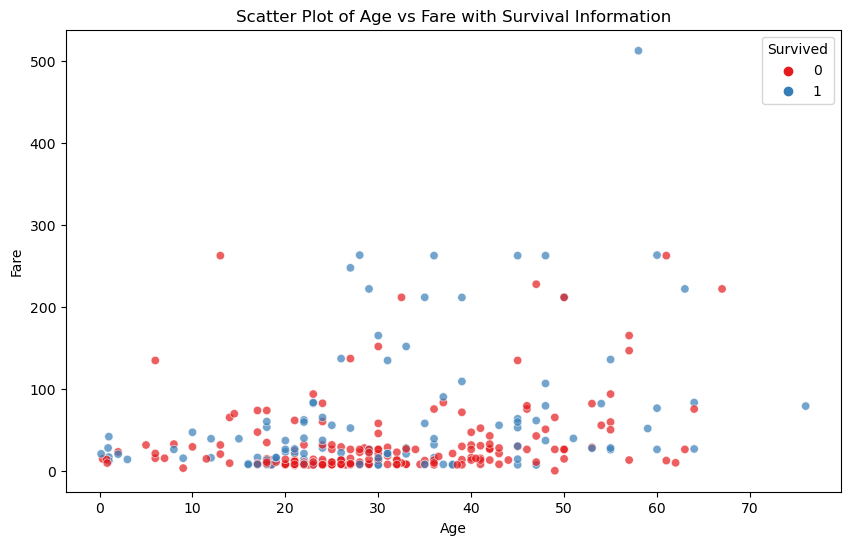

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df, palette='Set1', alpha=0.7)
plt.title('Scatter Plot of Age vs Fare with Survival Information')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


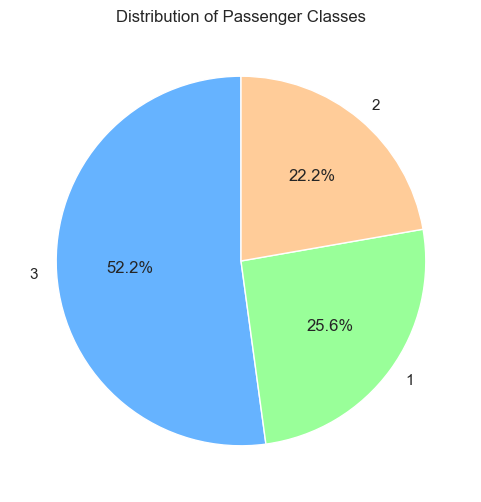

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

class_counts = df['Pclass'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Passenger Classes')
plt.show()

